## Calculating the hourly arrest rate

In [1]:
import pandas as pd

In [2]:
dosya = pd.read_csv("police.csv")

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (8,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
buyuk = pd.DataFrame(dosya)

In [4]:
ri = buyuk.sample(50000)

In [5]:
ri.drop(["county_name","state"], axis=1, inplace=True) 

In [6]:
ri.dropna(subset=["driver_gender"], inplace=True)

In [7]:
ri2 = ri.astype({"is_arrested" : "bool"}, copy=False)

In [8]:
ri2["is_arrested"].dtypes

dtype('bool')

In [9]:
combined = ri2.stop_date.str.cat(ri2.stop_time, sep = " ")

In [10]:
combined = pd.to_datetime(combined)

In [11]:
ri2["stop_datetime"] = combined

In [12]:
ri2.set_index("stop_datetime", inplace=True)

In [13]:
ri2

,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2007-05-26 02:25:00,RI-2007-23004,2007-05-26,02:25,Zone K2,NaN,NaN,900,F,1973.0,34.0,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K2
2014-10-05 11:29:00,RI-2014-40388,2014-10-05,11:29,Zone X1,NaN,NaN,0,M,1980.0,34.0,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X1
2012-07-05 13:33:00,RI-2012-36114,2012-07-05,13:33,Zone K2,NaN,NaN,900,M,1967.0,45.0,...,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone K2
2014-08-31 09:49:00,RI-2014-35337,2014-08-31,09:49,Zone K3,NaN,NaN,300,M,1981.0,33.0,...,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone K3
2009-03-04 06:55:00,RI-2009-08374,2009-03-04,06:55,Zone X4,NaN,NaN,500,M,1964.0,45.0,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-12-28 01:33:00,RI-2005-13478,2005-12-28,01:33,Zone K3,NaN,NaN,300,M,1981.0,24.0,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K3
2015-10-31 22:42:00,RI-2015-40068,2015-10-31,22:42,Zone K3,NaN,NaN,300,M,1984.0,31.0,...,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone K3
2013-05-23 01:21:00,RI-2013-17239,2013-05-23,01:21,Zone K3,NaN,NaN,300,M,1986.0,27.0,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone K3


In [14]:
ri2.head()

,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2007-05-26 02:25:00,RI-2007-23004,2007-05-26,02:25,Zone K2,NaN,NaN,900,F,1973.0,34.0,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K2
2014-10-05 11:29:00,RI-2014-40388,2014-10-05,11:29,Zone X1,NaN,NaN,0,M,1980.0,34.0,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X1
2012-07-05 13:33:00,RI-2012-36114,2012-07-05,13:33,Zone K2,NaN,NaN,900,M,1967.0,45.0,...,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone K2
2014-08-31 09:49:00,RI-2014-35337,2014-08-31,09:49,Zone K3,NaN,NaN,300,M,1981.0,33.0,...,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone K3
2009-03-04 06:55:00,RI-2009-08374,2009-03-04,06:55,Zone X4,NaN,NaN,500,M,1964.0,45.0,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4


In [15]:
ri2.index

DatetimeIndex(['2007-05-26 02:25:00', '2014-10-05 11:29:00',
               '2012-07-05 13:33:00', '2014-08-31 09:49:00',
               '2009-03-04 06:55:00', '2012-05-11 06:38:00',
               '2007-07-08 08:37:00', '2006-06-18 00:40:00',
               '2007-12-21 02:00:00', '2014-03-24 16:54:00',
               ...
               '2012-11-02 17:58:00', '2010-08-12 10:23:00',
               '2010-02-06 15:11:00', '2005-12-01 18:30:00',
               '2008-03-21 12:21:00', '2005-12-28 01:33:00',
               '2015-10-31 22:42:00', '2013-05-23 01:21:00',
               '2006-12-18 10:23:00', '2011-07-09 11:09:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=47176, freq=None)

In [14]:
ri2["is_arrested"].mean()*100

3.4618727608064273

In [16]:
ri2["date_time"]=ri2.index

In [17]:
ri2["date_time"]

stop_datetime
2007-05-26 02:25:00   2007-05-26 02:25:00
2014-10-05 11:29:00   2014-10-05 11:29:00
2012-07-05 13:33:00   2012-07-05 13:33:00
2014-08-31 09:49:00   2014-08-31 09:49:00
2009-03-04 06:55:00   2009-03-04 06:55:00
                              ...        
2005-12-28 01:33:00   2005-12-28 01:33:00
2015-10-31 22:42:00   2015-10-31 22:42:00
2013-05-23 01:21:00   2013-05-23 01:21:00
2006-12-18 10:23:00   2006-12-18 10:23:00
2011-07-09 11:09:00   2011-07-09 11:09:00
Name: date_time, Length: 47176, dtype: datetime64[ns]

In [21]:
ri2.date_time.dt.hour

stop_datetime
2007-05-26 02:25:00     2
2014-10-05 11:29:00    11
2012-07-05 13:33:00    13
2014-08-31 09:49:00     9
2009-03-04 06:55:00     6
                       ..
2005-12-28 01:33:00     1
2015-10-31 22:42:00    22
2013-05-23 01:21:00     1
2006-12-18 10:23:00    10
2011-07-09 11:09:00    11
Name: date_time, Length: 47176, dtype: int64

In [26]:
hourly_arrest_rate = ri2.groupby(ri2.index.hour).mean()["is_arrested"]*100

In [27]:
ri2.groupby(ri2.index.hour).mean()["is_arrested"]*100

stop_datetime
0     5.185466
1     6.922012
2     5.975275
3     6.583630
4     3.846154
5     2.419355
6     1.452644
7     1.117318
8     2.012940
9     2.643812
10    2.191130
11    2.807913
12    3.769634
13    3.182180
14    3.440054
15    3.178295
16    3.005604
17    4.573379
18    4.426378
19    2.769461
20    3.415783
21    5.851756
22    4.248183
23    4.203152
Name: is_arrested, dtype: float64

In [35]:
ri2.date_time.dt.weekday

stop_datetime
2007-09-02 01:00:00    6
2012-07-07 22:17:00    5
2010-08-07 08:01:00    5
2006-06-22 22:18:00    3
2006-10-13 21:20:00    4
                      ..
2011-10-07 23:35:00    4
2009-03-17 15:55:00    1
2006-11-28 19:45:00    1
2011-04-08 12:02:00    4
2013-07-08 09:25:00    0
Name: date_time, Length: 47171, dtype: int64

In [36]:
ri2.groupby(ri2.date_time.dt.hour).is_arrested.mean()

date_time
0     0.051855
1     0.069220
2     0.059753
3     0.065836
4     0.038462
5     0.024194
6     0.014526
7     0.011173
8     0.020129
9     0.026438
10    0.021911
11    0.028079
12    0.037696
13    0.031822
14    0.034401
15    0.031783
16    0.030056
17    0.045734
18    0.044264
19    0.027695
20    0.034158
21    0.058518
22    0.042482
23    0.042032
Name: is_arrested, dtype: float64

***

## Plotting the hourly arrest rate

In [44]:
import matplotlib.pyplot as plt

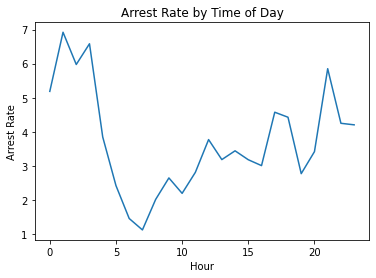

In [45]:
plt.plot(hourly_arrest_rate)
plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.title("Arrest Rate by Time of Day")
plt.show()

***

## Plotting drug-related stops

In [46]:
ri2["drugs_related_stop"].mean()*100

1.055733395518433

In [47]:
ri2["drugs_related_stop"].value_counts()

False    46673
True       498
Name: drugs_related_stop, dtype: int64

In [48]:
annual_drug_rate = ri2.groupby(ri2.index.year).mean()["drugs_related_stop"]*100

In [49]:
ri2.drugs_related_stop.resample("A").mean()*100

stop_datetime
2005-12-31    1.418969
2006-12-31    0.635209
2007-12-31    0.896767
2008-12-31    0.573951
2009-12-31    1.284027
2010-12-31    0.835232
2011-12-31    0.913901
2012-12-31    1.467956
2013-12-31    0.984494
2014-12-31    1.572712
2015-12-31    1.236233
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

In [50]:
ri2.drugs_related_stop.resample("Q").mean()*100  # 3 Aylık Raporlar Halinde

stop_datetime
2005-03-31    25.000000
2005-06-30          NaN
2005-09-30     0.000000
2005-12-31     1.363636
2006-03-31     1.015965
2006-06-30     0.372024
2006-09-30     0.583516
2006-12-31     0.564573
2007-03-31     0.676692
2007-06-30     0.935308
2007-09-30     1.394943
2007-12-31     0.579710
2008-03-31     0.437828
2008-06-30     0.455373
2008-09-30     0.833333
2008-12-31     0.550459
2009-03-31     1.162791
2009-06-30     1.385042
2009-09-30     1.257143
2009-12-31     1.344743
2010-03-31     0.790514
2010-06-30     0.892061
2010-09-30     0.510725
2010-12-31     1.191895
2011-03-31     0.780379
2011-06-30     1.492537
2011-09-30     0.969163
2011-12-31     0.446030
2012-03-31     1.563405
2012-06-30     1.630789
2012-09-30     1.406366
2012-12-31     1.128205
2013-03-31     0.903614
2013-06-30     0.974659
2013-09-30     1.036758
2013-12-31     1.020408
2014-03-31     1.289833
2014-06-30     1.301685
2014-09-30     1.894563
2014-12-31     1.890359
2015-03-31     1.696607
20

In [51]:
annual_drug_rate

stop_datetime
2005    1.418969
2006    0.635209
2007    0.896767
2008    0.573951
2009    1.284027
2010    0.835232
2011    0.913901
2012    1.467956
2013    0.984494
2014    1.572712
2015    1.236233
Name: drugs_related_stop, dtype: float64

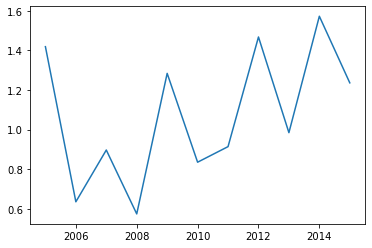

In [52]:
plt.plot(annual_drug_rate)
plt.show()

***

## Comparing drug and search rates (to be deleted)

In [58]:
ri2.search_conducted.dtypes

dtype('O')

In [59]:
ri2 = ri2.astype({"search_conducted" : "bool"})

In [60]:
ri2.search_conducted.dtypes

dtype('bool')

In [61]:
ri2.search_conducted.value_counts(dropna=False)

False    45439
True      1732
Name: search_conducted, dtype: int64

In [62]:
annual = ri2.groupby(ri2.index.year).mean()["search_conducted"]*100

In [67]:
# Alternatif  ri2.search_conducted.resample("A").mean()

In [66]:
annual

stop_datetime
2005    5.451830
2006    3.303085
2007    4.337852
2008    3.443709
2009    4.776579
2010    3.998988
2011    4.016354
2012    3.634085
2013    2.658134
2014    3.145425
2015    3.079344
Name: search_conducted, dtype: float64

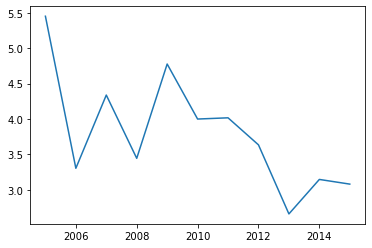

In [63]:
plt.plot(annual)

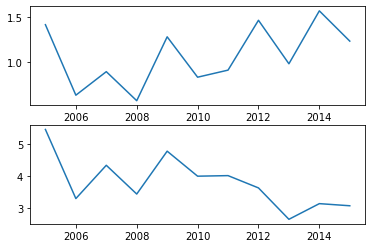

In [72]:
plt.subplot(2,1,1)
plt.plot(annual_drug_rate)
plt.subplot(2,1,2)
plt.plot(annual)
plt.show()

In [69]:
annual2 = pd.concat([annual_drug_rate, annual], axis = "columns")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002D8F99B0040>,
      dtype=object)

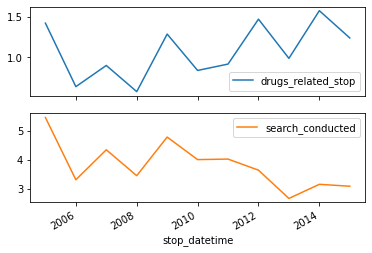

In [71]:
annual2.plot(subplots = True)

***

## Tallying violations by district

In [203]:
all_zones = pd.crosstab(ri2["district"], ri2["violation"])

In [204]:
all_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,374,699,146,56,0,3266
Zone K2,1161,1605,484,387,261,5591
Zone K3,1264,1532,386,372,367,6717
Zone X1,178,358,70,22,47,664
Zone X3,1059,1683,377,383,448,4793
Zone X4,1982,2985,908,726,483,5375


In [205]:
k_zones = all_zones.loc["Zone K1":"Zone K3"]

***

## Plotting violations by district

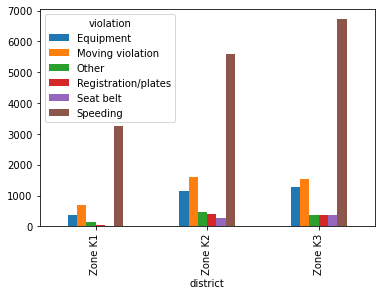

In [206]:
k_zones.plot.bar()

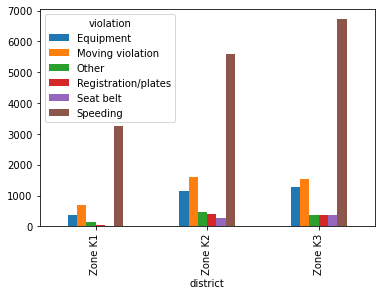

In [207]:
k_zones.plot(kind="bar")

**INSTRUCTIONS 2/2**

*   Create a stacked bar plot of ``k_zones``.
*   Display the plot and examine it. Do you notice anything different about the data than you did previously?

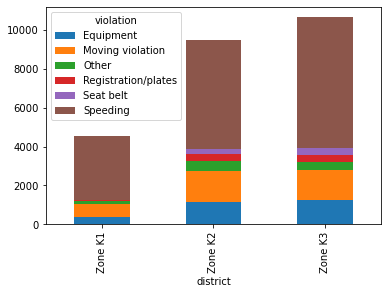

In [208]:
k_zones.plot(kind="bar", stacked=True)

***

## Converting stop durations to numbers

In [80]:
ri2.nunique()["stop_duration"]

4

In [81]:
ri2["stop_duration"].unique()

array(['0-15 Min', '16-30 Min', '30+ Min', '1'], dtype=object)

In [82]:
mapping = {"0-15 Min":8, "16-30 Min":23, "30+ Min":45}

In [85]:
ri2["stop_minutes"] = ri2["stop_duration"].map(mapping)

In [87]:
ri2.stop_minutes.value_counts(dropna=False)

8.0     37915
23.0     7467
45.0     1788
NaN         1
Name: stop_minutes, dtype: int64

In [88]:
ri2["stop_minutes"].unique()

array([ 8., 23., 45., nan])

***

## Plotting stop length

**INSTRUCTIONS**

*   For each value in the ``violation_raw`` column, calculate the **mean number** of ``stop_minutes`` that a driver is detained.
*   Save the resulting ``Series`` as a new object, ``stop_length``.
*   Sort ``stop_length`` by its values, and then visualize it using a **horizontal bar plot**.
*   Display the plot.

In [218]:
ri2["violation_raw"]

stop_datetime
2010-05-06 17:10:00           Other Traffic Violation
2012-05-20 10:03:00                          Speeding
2005-11-28 08:15:00           Other Traffic Violation
2015-07-03 23:20:00    Equipment/Inspection Violation
2007-01-10 08:55:00                          Speeding
                                    ...              
2012-05-04 15:59:00           Other Traffic Violation
2006-02-07 09:49:00                          Speeding
2006-09-22 15:20:00                          Speeding
2013-01-25 11:00:00    Equipment/Inspection Violation
2015-04-18 22:40:00    Equipment/Inspection Violation
Name: violation_raw, Length: 47209, dtype: object

In [224]:
pd.crosstab(ri2["violation_raw"], ri2["stop_minutes"])

stop_minutes,8,23,45
violation_raw,,,
APB,23,11,8
Call for Service,295,267,189
Equipment/Inspection Violation,4964,777,277
Motorist Assist/Courtesy,53,30,7
Other Traffic Violation,6415,1730,717
Registration Violation,1371,465,110
Seatbelt Violation,1437,145,24
Special Detail/Directed Patrol,908,323,120
Speeding,22337,3740,329


In [90]:
stop_length = ri2.groupby("violation_raw").mean()["stop_minutes"]

In [91]:
a = stop_length.sort_values()

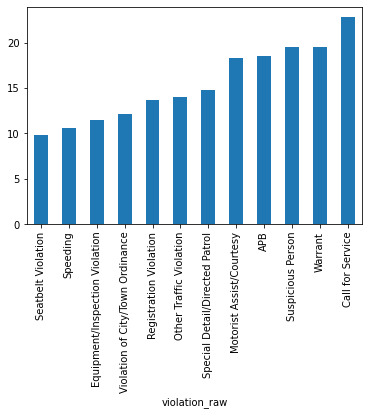

In [92]:
a.plot(kind="bar")
plt.show()

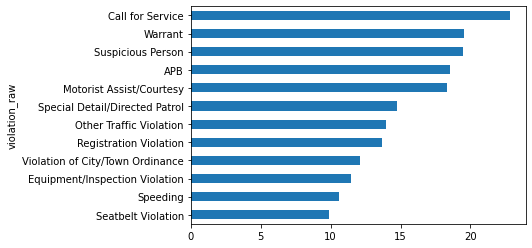

In [94]:
stop_length.sort_values().plot(kind="barh")